# In this notebook i want to implement "overfitting" and "underfitting"
with random number and Gaussian noise and polynomial curve

In [18]:
#import some useful library
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

assume that we have 500 sample then we create sinusoidal signal and add gausian noise to this signal

the noise profile is as follows:

average = 0
variance = 0.5

In [19]:
number_of_record = 500
mu, sigma = 0, 0.8
X_axis = np.linspace(0, 2, number_of_record).reshape(number_of_record,1)
signal_with_out_noise = np.cos(2 * np.pi * X_axis)
noise = np.random.normal(mu,sigma,[number_of_record,1])
signal = (noise + signal_with_out_noise)

Degree	MSE			Bias			Variance
1	1.151589873839502	0.8642147563539012	0.00022680931093672717
4	0.789413507563432	0.7169473203684893	0.36240317558700536
8	0.6122547978652176	0.6171963619923513	0.539561885284367
10	0.6118288895252885	0.6176875352153678	0.5399877936255623
12	0.6116388623580796	0.6185581536791701	0.5401778207931396
15	0.609421486842026	0.6169492829676584	0.5423951546610836
20	0.6080099328637936	0.6183256673014885	0.543759137494776


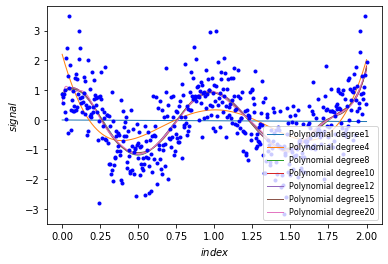

In [20]:
degrees = [1, 4, 8, 10, 12, 15, 20]
print("Degree\tMSE\t\t\tBias\t\t\tVariance")

for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(X_axis)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, signal)
    X_new_poly = poly_features.transform(X_axis)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X_axis, y_new, linewidth=1, label="Polynomial degree" + str(deg))
    print(str(deg), end='\t')
    print(str(mean_squared_error(y_new, signal)), end='\t')
    print(str(np.mean(abs(y_new - signal))), end='\t')
    print(str(np.var(y_new)))
    
plt.plot(X_axis, signal, "b.")
plt.xlabel("$index$", fontsize=10)
plt.ylabel("$signal$", rotation=90, fontsize=10)
plt.legend(loc="lower right", fontsize=8)
plt.show()